In [1]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
import numpy as np
import cv2
import os
import torch
import albumentations as A
original_shape = (4493, 5871)
IMAGE_SIZE = (1408,1056)
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from torch.optim import Adam ,lr_scheduler
df = pd.read_csv('data/metadata.csv')

In [2]:
from src.models.model import UNet
model = UNet(encoder_name='timm-efficientnet-b0', encoder_weights='imagenet', in_channels=1, classes=1, activation=None)
model.to(device)
optimizer = Adam(model.parameters(), lr=1e-2)
scheduler = lr_scheduler.ReduceLROnPlateau(
    optimizer,                                 
    factor=0.5 ,                                
    patience=0 , 
    threshold=0.01,                            
    verbose=True , 
    min_lr=1e-5 ,                               
    threshold_mode='abs')

In [3]:
from src.data.dataset import create_dataloader , train_augmentation
from src.models.train_model import*
from src.models.eval_model import*
train_dl = create_dataloader(df, 
                            train=True,
                            resize=IMAGE_SIZE,
                            augment=train_augmentation, 
                            batch_size=1)
                        
test_dl = create_dataloader(df, 
                            train=False,
                            resize=IMAGE_SIZE,
                            augment=None,
                            batch_size=1)
for image , mask in train_dl:
    print(image.shape)
    print(mask.shape)
    break
for image , mask in test_dl:
    print(image.shape)
    print(mask.shape)
    break
                           

torch.Size([1, 1, 1056, 1408])
torch.Size([1, 1, 1056, 1408])
torch.Size([1, 1, 1056, 1408])
torch.Size([1, 1, 1056, 1408])


In [5]:
best_loss = np.inf
train_lossess = []
valid_lossess = []
iou_scores = []
pixel_accuracy_scores = []
epochs = 30
train_metrics = Metrics()
valid_metrics = Metrics()
for i in range(epochs):
    print(f'Epoch: {i+1}:')
    train_loss, train_metrics_values = train_fn(train_dl, model, optimizer , train_metrics)
    train_lossess.append(train_loss)
    valid_loss,valid_metrics_values = eval_fn(test_dl, model , valid_metrics)
    valid_lossess.append(valid_loss)
    scheduler.step(valid_loss)
    print('\n')
    print("     Train/Valid")
    print(f"       Loss: {train_loss:.3f} | {valid_loss:.3f}")
    for key in train_metrics_values.keys():
        print(f"       {key}: {train_metrics_values[key]:.3f} | {valid_metrics_values[key]:.3f}")

    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), f'models/best_model.pth')
        print('Model Saved')
    print('============================================================')

Epoch: 1:


100%|██████████| 70/70 [01:27<00:00,  1.25s/it]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:15<00:00,  1.29it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.535 | 0.324
       accuracy: 0.971 | 0.971
       precision: 0.673 | 0.777
       recall: 0.705 | 0.857
       f1_score: 0.593 | 0.789
       specificity: 0.987 | 0.976
       iou: 0.475 | 0.675
Model Saved
Epoch: 2:


100%|██████████| 70/70 [00:53<00:00,  1.31it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.85it/s]


Epoch Metrics Saved!
Epoch 00002: reducing learning rate of group 0 to 5.0000e-03.


     Train/Valid
       Loss: 0.285 | 0.374
       accuracy: 0.979 | 0.969
       precision: 0.756 | 0.763
       recall: 0.750 | 0.862
       f1_score: 0.697 | 0.780
       specificity: 0.991 | 0.974
       iou: 0.581 | 0.662
Epoch: 3:


100%|██████████| 70/70 [00:53<00:00,  1.30it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.85it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.244 | 0.267
       accuracy: 0.982 | 0.972
       precision: 0.784 | 0.786
       recall: 0.780 | 0.859
       f1_score: 0.739 | 0.794
       specificity: 0.993 | 0.977
       iou: 0.627 | 0.681
Model Saved
Epoch: 4:


100%|██████████| 70/70 [00:53<00:00,  1.31it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:11<00:00,  1.79it/s]


Epoch Metrics Saved!
Epoch 00004: reducing learning rate of group 0 to 2.5000e-03.


     Train/Valid
       Loss: 0.173 | 0.291
       accuracy: 0.984 | 0.972
       precision: 0.808 | 0.785
       recall: 0.805 | 0.865
       f1_score: 0.773 | 0.800
       specificity: 0.994 | 0.977
       iou: 0.666 | 0.687
Epoch: 5:


100%|██████████| 70/70 [00:53<00:00,  1.30it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:11<00:00,  1.80it/s]


Epoch Metrics Saved!
Epoch 00005: reducing learning rate of group 0 to 1.2500e-03.


     Train/Valid
       Loss: 0.144 | 0.290
       accuracy: 0.986 | 0.973
       precision: 0.828 | 0.792
       recall: 0.823 | 0.861
       f1_score: 0.798 | 0.805
       specificity: 0.994 | 0.978
       iou: 0.696 | 0.691
Epoch: 6:


100%|██████████| 70/70 [00:53<00:00,  1.30it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:11<00:00,  1.81it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.131 | 0.213
       accuracy: 0.987 | 0.974
       precision: 0.842 | 0.803
       recall: 0.836 | 0.866
       f1_score: 0.816 | 0.814
       specificity: 0.995 | 0.979
       iou: 0.719 | 0.705
Model Saved
Epoch: 7:


100%|██████████| 70/70 [00:52<00:00,  1.32it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.88it/s]


Epoch Metrics Saved!
Epoch 00007: reducing learning rate of group 0 to 6.2500e-04.


     Train/Valid
       Loss: 0.129 | 0.263
       accuracy: 0.988 | 0.975
       precision: 0.852 | 0.807
       recall: 0.846 | 0.865
       f1_score: 0.829 | 0.818
       specificity: 0.995 | 0.980
       iou: 0.735 | 0.709
Epoch: 8:


100%|██████████| 70/70 [00:51<00:00,  1.35it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.87it/s]


Epoch Metrics Saved!
Epoch 00008: reducing learning rate of group 0 to 3.1250e-04.


     Train/Valid
       Loss: 0.127 | 0.325
       accuracy: 0.989 | 0.974
       precision: 0.859 | 0.802
       recall: 0.853 | 0.869
       f1_score: 0.839 | 0.817
       specificity: 0.995 | 0.979
       iou: 0.747 | 0.708
Epoch: 9:


100%|██████████| 70/70 [00:51<00:00,  1.35it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.91it/s]


Epoch Metrics Saved!
Epoch 00009: reducing learning rate of group 0 to 1.5625e-04.


     Train/Valid
       Loss: 0.121 | 0.217
       accuracy: 0.989 | 0.975
       precision: 0.866 | 0.808
       recall: 0.859 | 0.871
       f1_score: 0.847 | 0.822
       specificity: 0.995 | 0.980
       iou: 0.757 | 0.715
Epoch: 10:


100%|██████████| 70/70 [00:51<00:00,  1.35it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.93it/s]


Epoch Metrics Saved!
Epoch 00010: reducing learning rate of group 0 to 7.8125e-05.


     Train/Valid
       Loss: 0.118 | 0.256
       accuracy: 0.990 | 0.975
       precision: 0.871 | 0.809
       recall: 0.865 | 0.872
       f1_score: 0.854 | 0.825
       specificity: 0.995 | 0.980
       iou: 0.766 | 0.718
Epoch: 11:


100%|██████████| 70/70 [00:52<00:00,  1.34it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.90it/s]


Epoch Metrics Saved!
Epoch 00011: reducing learning rate of group 0 to 3.9063e-05.


     Train/Valid
       Loss: 0.126 | 0.264
       accuracy: 0.990 | 0.975
       precision: 0.875 | 0.810
       recall: 0.869 | 0.873
       f1_score: 0.859 | 0.826
       specificity: 0.996 | 0.980
       iou: 0.772 | 0.719
Epoch: 12:


100%|██████████| 70/70 [00:52<00:00,  1.34it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.87it/s]


Epoch Metrics Saved!
Epoch 00012: reducing learning rate of group 0 to 1.9531e-05.


     Train/Valid
       Loss: 0.120 | 0.305
       accuracy: 0.990 | 0.975
       precision: 0.878 | 0.809
       recall: 0.873 | 0.873
       f1_score: 0.863 | 0.826
       specificity: 0.996 | 0.980
       iou: 0.778 | 0.719
Epoch: 13:


100%|██████████| 70/70 [00:52<00:00,  1.34it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.86it/s]


Epoch Metrics Saved!
Epoch 00013: reducing learning rate of group 0 to 1.0000e-05.


     Train/Valid
       Loss: 0.119 | 0.249
       accuracy: 0.990 | 0.975
       precision: 0.881 | 0.811
       recall: 0.875 | 0.873
       f1_score: 0.867 | 0.828
       specificity: 0.996 | 0.980
       iou: 0.783 | 0.721
Epoch: 14:


100%|██████████| 70/70 [00:51<00:00,  1.36it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.92it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.121 | 0.500
       accuracy: 0.991 | 0.974
       precision: 0.884 | 0.802
       recall: 0.878 | 0.875
       f1_score: 0.871 | 0.823
       specificity: 0.996 | 0.978
       iou: 0.787 | 0.714
Epoch: 15:


100%|██████████| 70/70 [00:52<00:00,  1.34it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.86it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.120 | 0.210
       accuracy: 0.991 | 0.974
       precision: 0.886 | 0.806
       recall: 0.880 | 0.875
       f1_score: 0.873 | 0.826
       specificity: 0.996 | 0.979
       iou: 0.791 | 0.719
Model Saved
Epoch: 16:


100%|██████████| 70/70 [00:52<00:00,  1.34it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.86it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.119 | 0.439
       accuracy: 0.991 | 0.974
       precision: 0.888 | 0.800
       recall: 0.882 | 0.875
       f1_score: 0.876 | 0.823
       specificity: 0.996 | 0.978
       iou: 0.794 | 0.714
Epoch: 17:


100%|██████████| 70/70 [00:51<00:00,  1.35it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.93it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.121 | 0.283
       accuracy: 0.991 | 0.974
       precision: 0.890 | 0.800
       recall: 0.883 | 0.876
       f1_score: 0.878 | 0.823
       specificity: 0.996 | 0.978
       iou: 0.797 | 0.715
Epoch: 18:


100%|██████████| 70/70 [00:52<00:00,  1.34it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.88it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.117 | 0.285
       accuracy: 0.991 | 0.974
       precision: 0.892 | 0.800
       recall: 0.885 | 0.877
       f1_score: 0.880 | 0.824
       specificity: 0.996 | 0.978
       iou: 0.799 | 0.715
Epoch: 19:


100%|██████████| 70/70 [00:52<00:00,  1.35it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.93it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.122 | 0.271
       accuracy: 0.991 | 0.974
       precision: 0.893 | 0.800
       recall: 0.886 | 0.878
       f1_score: 0.882 | 0.824
       specificity: 0.996 | 0.978
       iou: 0.802 | 0.716
Epoch: 20:


100%|██████████| 70/70 [00:52<00:00,  1.35it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.93it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.119 | 0.407
       accuracy: 0.991 | 0.973
       precision: 0.894 | 0.796
       recall: 0.887 | 0.878
       f1_score: 0.883 | 0.822
       specificity: 0.996 | 0.977
       iou: 0.804 | 0.714
Epoch: 21:


100%|██████████| 70/70 [00:51<00:00,  1.35it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.85it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.118 | 0.244
       accuracy: 0.992 | 0.973
       precision: 0.895 | 0.798
       recall: 0.889 | 0.879
       f1_score: 0.885 | 0.824
       specificity: 0.996 | 0.978
       iou: 0.806 | 0.715
Epoch: 22:


100%|██████████| 70/70 [00:52<00:00,  1.35it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.85it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.122 | 0.319
       accuracy: 0.992 | 0.973
       precision: 0.896 | 0.797
       recall: 0.890 | 0.879
       f1_score: 0.886 | 0.824
       specificity: 0.996 | 0.978
       iou: 0.807 | 0.715
Epoch: 23:


100%|██████████| 70/70 [00:51<00:00,  1.35it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.93it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.121 | 0.201
       accuracy: 0.992 | 0.974
       precision: 0.897 | 0.800
       recall: 0.891 | 0.879
       f1_score: 0.887 | 0.826
       specificity: 0.996 | 0.978
       iou: 0.809 | 0.718
Model Saved
Epoch: 24:


100%|██████████| 70/70 [00:51<00:00,  1.36it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.88it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.120 | 0.300
       accuracy: 0.992 | 0.974
       precision: 0.898 | 0.800
       recall: 0.891 | 0.880
       f1_score: 0.888 | 0.826
       specificity: 0.996 | 0.978
       iou: 0.810 | 0.718
Epoch: 25:


100%|██████████| 70/70 [00:52<00:00,  1.34it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.89it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.116 | 0.223
       accuracy: 0.992 | 0.974
       precision: 0.899 | 0.802
       recall: 0.892 | 0.879
       f1_score: 0.889 | 0.827
       specificity: 0.996 | 0.978
       iou: 0.811 | 0.720
Epoch: 26:


100%|██████████| 70/70 [00:52<00:00,  1.33it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.88it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.118 | 0.401
       accuracy: 0.992 | 0.974
       precision: 0.900 | 0.799
       recall: 0.893 | 0.879
       f1_score: 0.890 | 0.825
       specificity: 0.996 | 0.978
       iou: 0.813 | 0.717
Epoch: 27:


100%|██████████| 70/70 [00:53<00:00,  1.32it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.93it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.121 | 0.285
       accuracy: 0.992 | 0.974
       precision: 0.900 | 0.799
       recall: 0.894 | 0.879
       f1_score: 0.891 | 0.826
       specificity: 0.996 | 0.978
       iou: 0.814 | 0.718
Epoch: 28:


100%|██████████| 70/70 [00:52<00:00,  1.32it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.90it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.118 | 0.339
       accuracy: 0.992 | 0.973
       precision: 0.901 | 0.798
       recall: 0.895 | 0.879
       f1_score: 0.892 | 0.825
       specificity: 0.996 | 0.978
       iou: 0.815 | 0.717
Epoch: 29:


100%|██████████| 70/70 [00:53<00:00,  1.31it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.85it/s]


Epoch Metrics Saved!


     Train/Valid
       Loss: 0.122 | 0.305
       accuracy: 0.992 | 0.973
       precision: 0.902 | 0.798
       recall: 0.895 | 0.880
       f1_score: 0.893 | 0.825
       specificity: 0.996 | 0.978
       iou: 0.816 | 0.717
Epoch: 30:


100%|██████████| 70/70 [00:52<00:00,  1.33it/s]


Epoch Metrics Saved!


100%|██████████| 20/20 [00:10<00:00,  1.86it/s]

Epoch Metrics Saved!


     Train/Valid
       Loss: 0.115 | 0.235
       accuracy: 0.992 | 0.974
       precision: 0.902 | 0.799
       recall: 0.896 | 0.880
       f1_score: 0.894 | 0.826
       specificity: 0.996 | 0.978
       iou: 0.817 | 0.718


In [21]:
def visualize_metrics(train_metrics, valid_metrics ,
                           metric_name , figsize=(10, 7), 
                             ):
    """
    Visualize the data
    """
    plt.figure(figsize=figsize)
    plt.plot(train_metrics.get_epochs_values()[metric_name], color='blue', label=f'Train {metric_name.title()}')
    plt.plot(valid_metrics.get_epochs_values()[metric_name], color='red', label=f'Valid {metric_name.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(f"{metric_name.title()}")
    plt.title(f'{metric_name.title()} over epochs')
    plt.legend()
    plt.show()

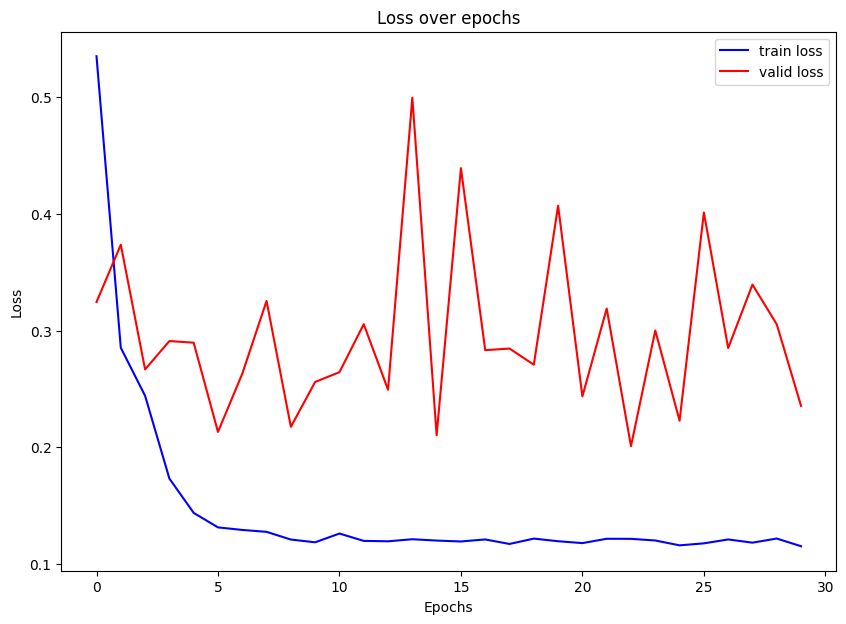

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(train_lossess, color='blue', label='train loss')
plt.plot(valid_lossess, color='red', label='valid loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

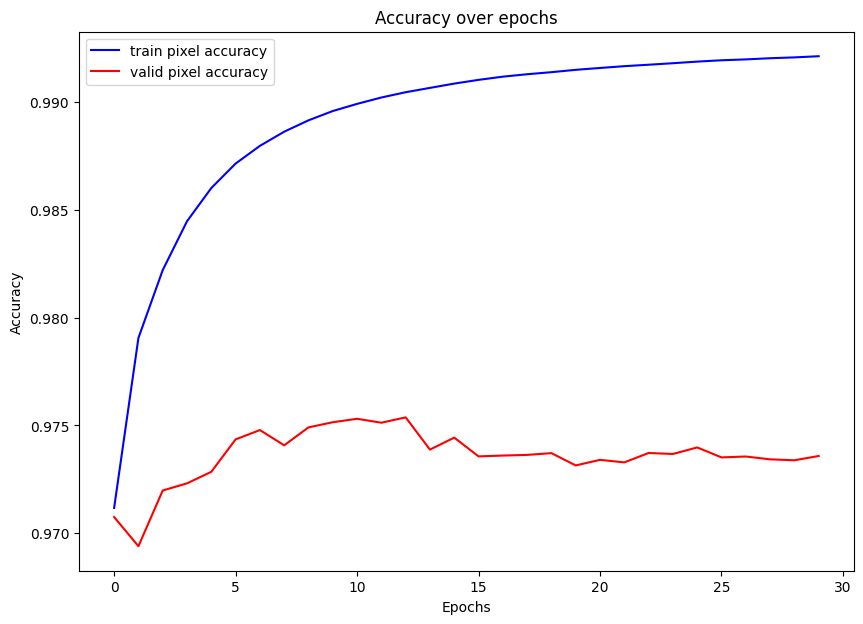

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(train_metrics.get_epochs_values()['accuracy'], color='blue', label='train pixel accuracy')
plt.plot(valid_metrics.get_epochs_values()['accuracy'], color='red', label='valid pixel accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

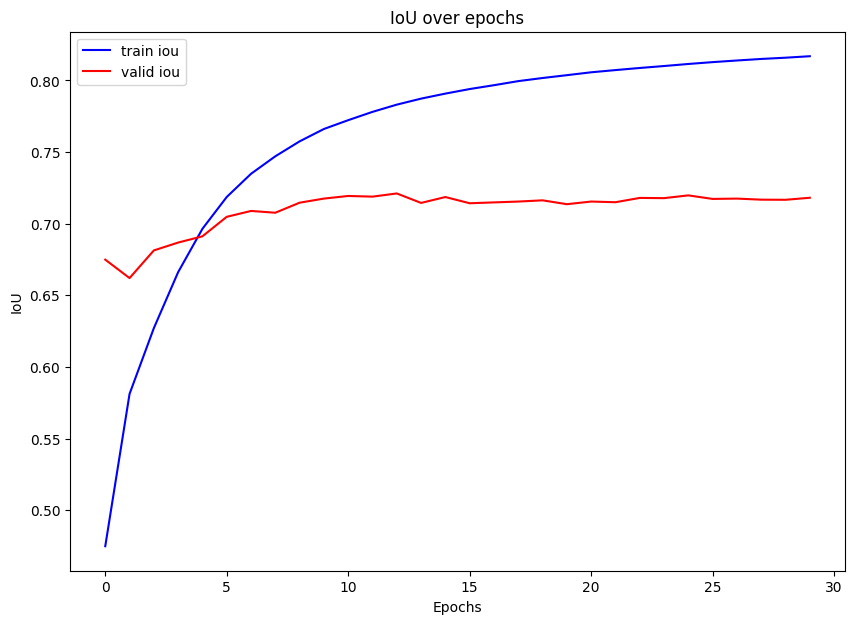

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(train_metrics.get_epochs_values()['iou'], color='blue', label='train iou')
plt.plot(valid_metrics.get_epochs_values()['iou'], color='red', label='valid iou')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.title('IoU over epochs')
plt.legend()
plt.show()

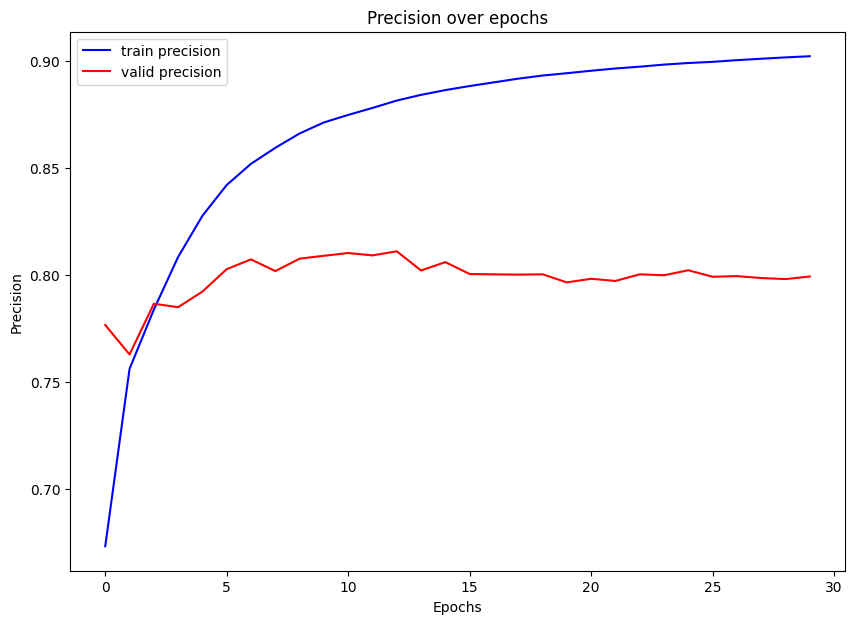

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(train_metrics.get_epochs_values()['precision'], color='blue', label='train precision')
plt.plot(valid_metrics.get_epochs_values()['precision'], color='red', label='valid precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Precision over epochs')
plt.legend()
plt.show()


In [13]:
np.save('reports/VV/train_lossess.npy',train_lossess)
np.save('reports/VV/valid_lossess.npy',valid_lossess)
np.save('reports/VV/train_accuracy.npy',train_metrics.get_epochs_values()['accuracy'])
np.save('reports/VV/valid_accuracy.npy',valid_metrics.get_epochs_values()['accuracy'])
np.save('reports/VV/train_iou.npy',train_metrics.get_epochs_values()['iou'])
np.save('reports/VV/valid_iou.npy',valid_metrics.get_epochs_values()['iou'])
np.save('reports/VV/train_precision.npy',train_metrics.get_epochs_values()['precision'])
np.save('reports/VV/valid_precision.npy',valid_metrics.get_epochs_values()['precision'])
np.save('reports/VV/train_recall.npy',train_metrics.get_epochs_values()['recall'])
np.save('reports/VV/valid_recall.npy',valid_metrics.get_epochs_values()['recall'])
np.save('reports/VV/train_f1.npy',train_metrics.get_epochs_values()['f1_score'])
np.save('reports/VV/valid_f1.npy',valid_metrics.get_epochs_values()['f1_score'])
np.save('reports/VV/train_specificity.npy',train_metrics.get_epochs_values()['specificity'])
np.save('reports/VV/valid_specificity.npy',valid_metrics.get_epochs_values()['specificity'])


In [20]:
'name'.title()

'Name'